In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
from data_scripts import *

tex_fonts = {
    # Use LaTeX to write all text
    # "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
}

sns.set_theme(
    # context="talk",
    context="paper",
    # rc={"figure.figsize": (8, 6)},
    palette="bright",
    style="whitegrid",
    rc=tex_fonts,
)

NUM_SIMS = 5
CONVERGED = False


data = {
    'Coldstart eps (from exp.2)': load_data("../2/poro_coldstart_l", n_newest=NUM_SIMS),
    # "Coldstart no exploration": load_data("poro_coldstart_eps0", n_newest=NUM_SIMS),
    # "Coldstart big exploration": load_data("poro_coldstart_eps_big", n_newest=NUM_SIMS),

    # 'Warmstart eps (from exp.2)': load_data("../2/poro_warmstart_l_sm", n_newest=NUM_SIMS),
    # "Warmstart no exploration": load_data("poro_warmstart_eps0", n_newest=NUM_SIMS),
    # "Warmstart big exploration": load_data("poro_warmstart_eps_big", n_newest=NUM_SIMS),
    
    "Coldstart GP": load_data("poro_coldstart_gp", n_newest=NUM_SIMS),
    # "Warmstart GP": load_data("poro_warmstart_gp", n_newest=NUM_SIMS),
    # "Warmstart GP no expl.": load_data('poro_warmstart_gp_no_exploration', n_newest=NUM_SIMS)
}


save_media_path = None

Loading data:
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/3/../2/performance/poro_coldstart_l_6.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/3/../2/performance/poro_coldstart_l_7.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/3/../2/performance/poro_coldstart_l_8.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/3/../2/performance/poro_coldstart_l_9.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/3/../2/performance/poro_coldstart_l_10.npy


/home/firedrake/workspace/porepy_workspace/porepy/src/porepy/numerics/nonlinear/nonlinear_solvers.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange  # type: ignore


Loading data:
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/3/performance/poro_coldstart_gp_9.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/3/performance/poro_coldstart_gp_10.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/3/performance/poro_coldstart_gp_11.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/3/performance/poro_coldstart_gp_12.npy
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/3/performance/poro_coldstart_gp_13.npy


Coldstart eps (from exp.2) 265.3125071525574 13.72430419921875
Coldstart GP 259.45215888023375 12.126377820968628


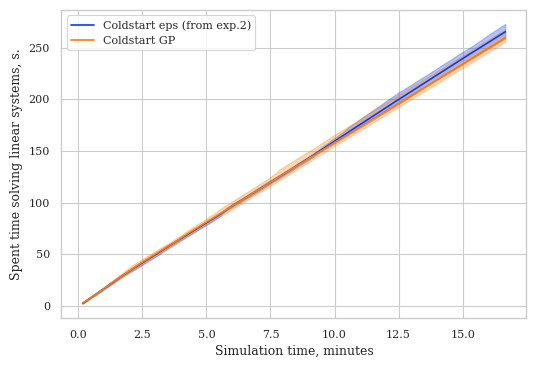

In [3]:
MINUTE = 60

best_time = float('inf')
color_iter = -1
plt.figure(figsize=(6, 4))
for name, values in data.items():
    results = []
    times = []
    color_iter += 1

    for perf in values:
        results.append(
            np.cumsum(
                sum_per_time_step(
                    make_solve_linear_system_time(perf, converged=CONVERGED),
                    perf,
                    converged=CONVERGED,
                )
            )
        )
        times.append(make_simulation_time(perf, converged=CONVERGED))

    total = []
    t_end = []
    interp_data_list = []
    x_space = np.linspace(times[0][0], times[0][-1], 1000)
    for time, result in zip(times, results):
        total.append(result[-1])
        t_end.append(time[-1])

        interp_data_list.append(np.interp(x_space, time, result))

    interp_data = np.array(interp_data_list)
    max_ = np.max(interp_data, axis=0)
    min_ = np.min(interp_data, axis=0)
    mean = np.mean(interp_data, axis=0)
    x_space /= MINUTE
    plt.fill_between(x_space, min_, max_, color=f"C{color_iter}", alpha=0.3)
    plt.plot(x_space, mean, color=f"C{color_iter}", label=name)
    print(name, np.mean(total), np.max(total) - np.min(total))
    assert np.allclose(t_end, t_end[0], rtol=1e-10)
    if best_time > np.mean(total):
        best_time = np.mean(total)
        best = mean
        best_name = name
    

plt.legend()
plt.xlabel("Simulation time, minutes")
plt.ylabel("Spent time solving linear systems, s.")

if save_media_path is not None:
    plt.savefig(save_media_path / "thermal_performance.pdf", bbox_inches="tight")

Coldstart eps (from exp.2) 265.3125071525574 13.72430419921875
Coldstart GP 259.45215888023375 12.126377820968628


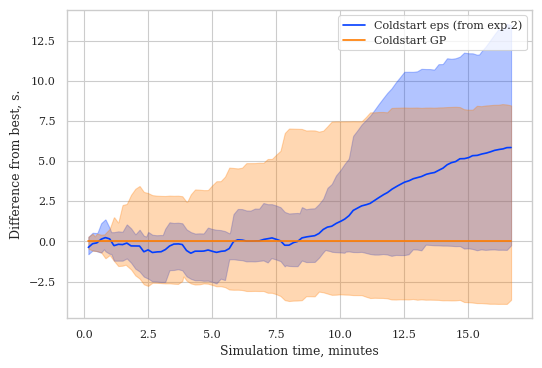

In [4]:
MINUTE = 60

color_iter = -1
plt.figure(figsize=(6, 4))
for name, values in data.items():
    results = []
    times = []
    color_iter += 1

    for perf in values:
        results.append(
            np.cumsum(
                sum_per_time_step(
                    make_solve_linear_system_time(perf, converged=CONVERGED),
                    perf,
                    converged=CONVERGED,
                )
            )
        )
        times.append(make_simulation_time(perf, converged=CONVERGED))

    total = []
    t_end = []
    interp_data_list = []
    x_space = np.linspace(times[0][0], times[0][-1], 1000)
    for time, result in zip(times, results):
        total.append(result[-1])
        t_end.append(time[-1])

        interp_data_list.append(np.interp(x_space, time, result))

    interp_data = np.array(interp_data_list)
    max_ = np.max(interp_data, axis=0) - best
    min_ = np.min(interp_data, axis=0) - best
    mean = np.mean(interp_data, axis=0) - best
    x_space /= MINUTE
    plt.fill_between(x_space, min_, max_, color=f"C{color_iter}", alpha=0.3)
    plt.plot(x_space, mean, color=f"C{color_iter}", label=name)
    print(name, np.mean(total), np.max(total) - np.min(total))
    assert np.allclose(t_end, t_end[0], rtol=1e-10)

    

plt.legend()
plt.xlabel("Simulation time, minutes")
plt.ylabel("Difference from best, s.")

if save_media_path is not None:
    plt.savefig(save_media_path / "thermal_performance.pdf", bbox_inches="tight")

In [5]:
metrics = {
    "coldstart Gaussian process": np.load('performance/poro_coldstart_gp_13_metrics.npy', allow_pickle=True).item(),
    "warmstart Gaussian process": np.load('performance/poro_warmstart_gp_13_metrics.npy', allow_pickle=True).item(),
    "warmstart Gradient boosting": np.load('performance/poro_warmstart_eps0_10_metrics.npy', allow_pickle=True).item(),
}


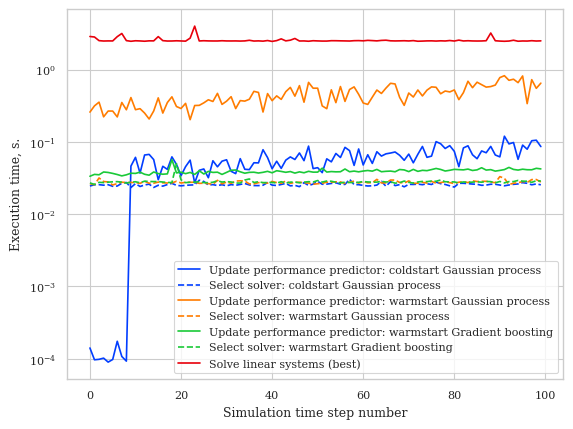

In [6]:
fig = plt.figure()
for i, (name, metric) in enumerate(metrics.items()):
    plt.plot(
        metric["update_selector_times"],
        label=f"Update performance predictor: {name}",
        color=f"C{i}",
    )
    plt.plot(
        metric["select_solver_times"],
        label=f"Select solver: {name}",
        color=f"C{i}",
        linestyle="--",
    )

solve_best_time = sum_per_time_step(
    make_solve_linear_system_time(data[best_name][0], converged=CONVERGED),
    data[best_name][0],
    converged=CONVERGED,
)
plt.plot(solve_best_time, label="Solve linear systems (best)", color=f"C{i+1}")
plt.yscale("log")
plt.ylabel("Execution time, s.")
plt.xlabel("Simulation time step number")
# fig.legend(loc="center", bbox_to_anchor=(0.5, -.1))
plt.legend(loc="lower right")
# plt.ylim(bottom=1e-2)